In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time

plt.rcParams.update({'font.size': 18})

In [2]:
h5_file = "20230501-210315_fftw.h5"
# h5_file = "test_file.h5"

Reading 20230501-210315_fftw.h5


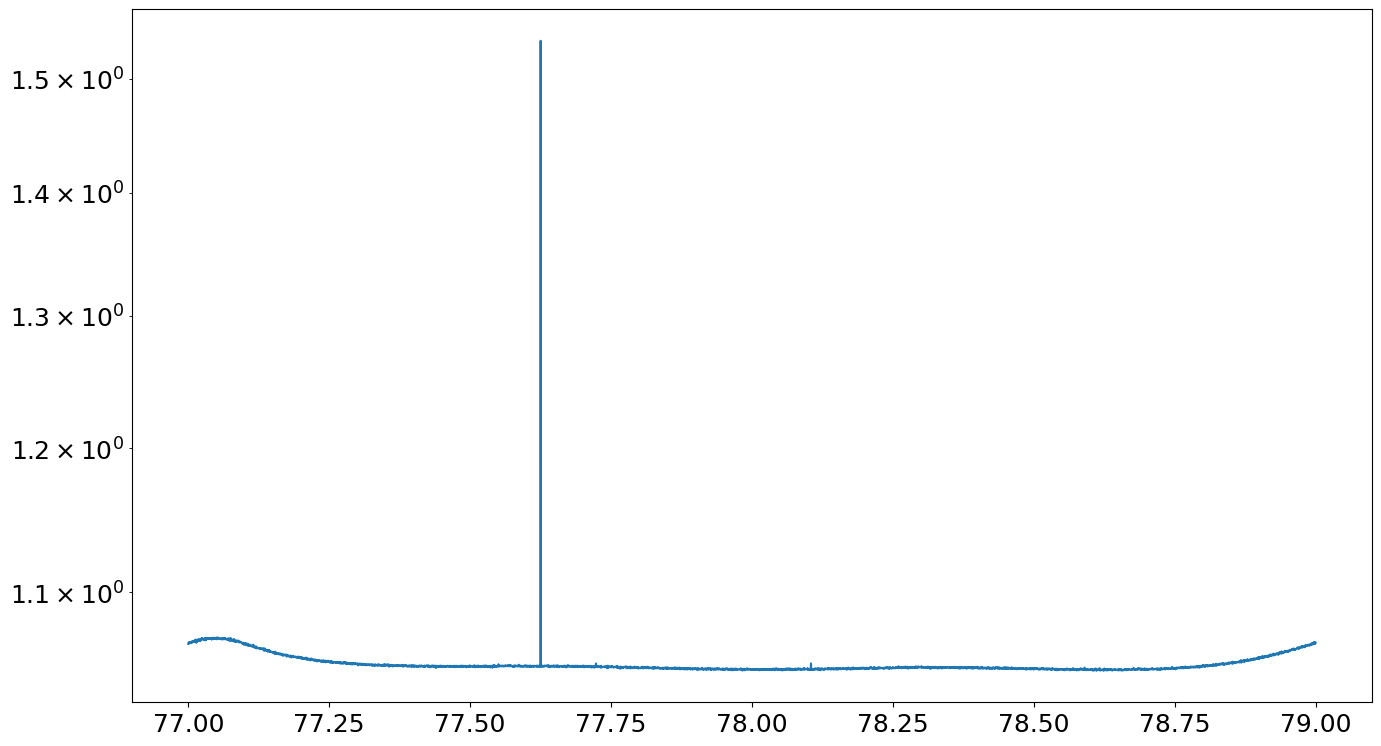

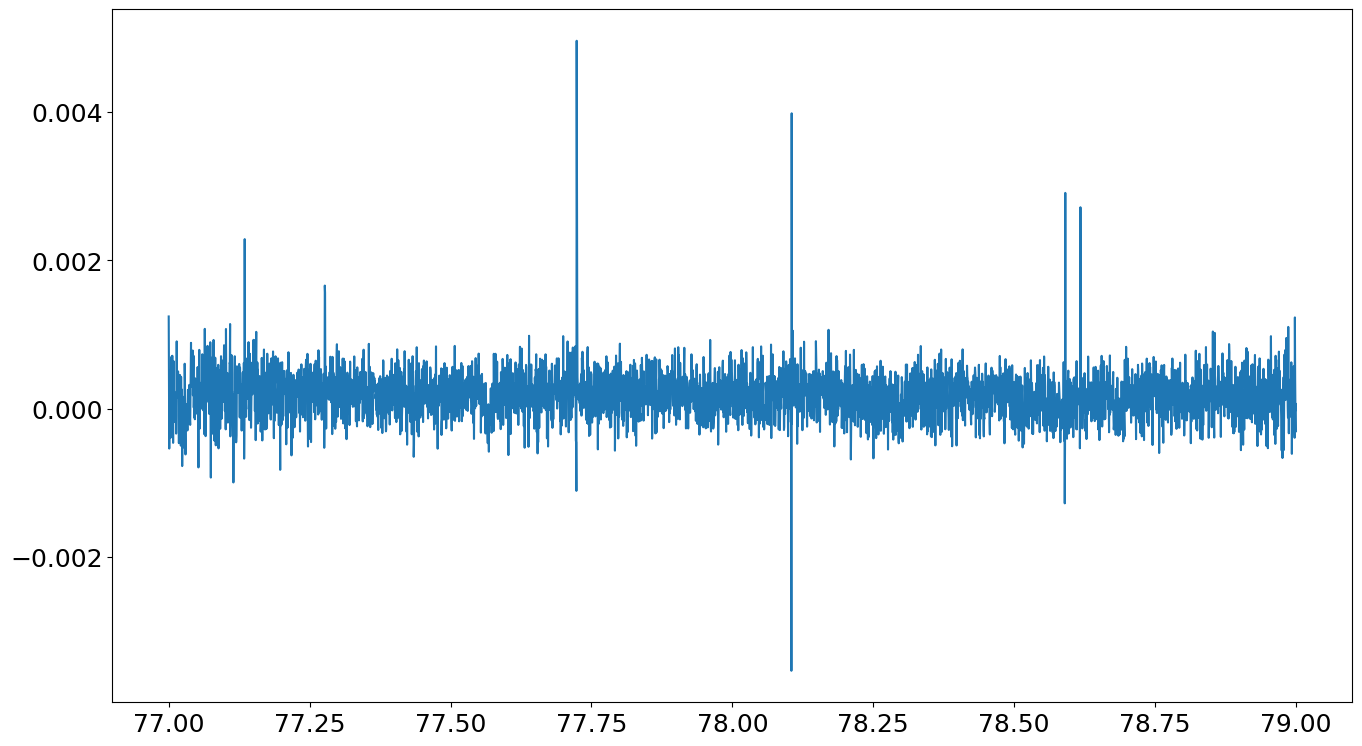

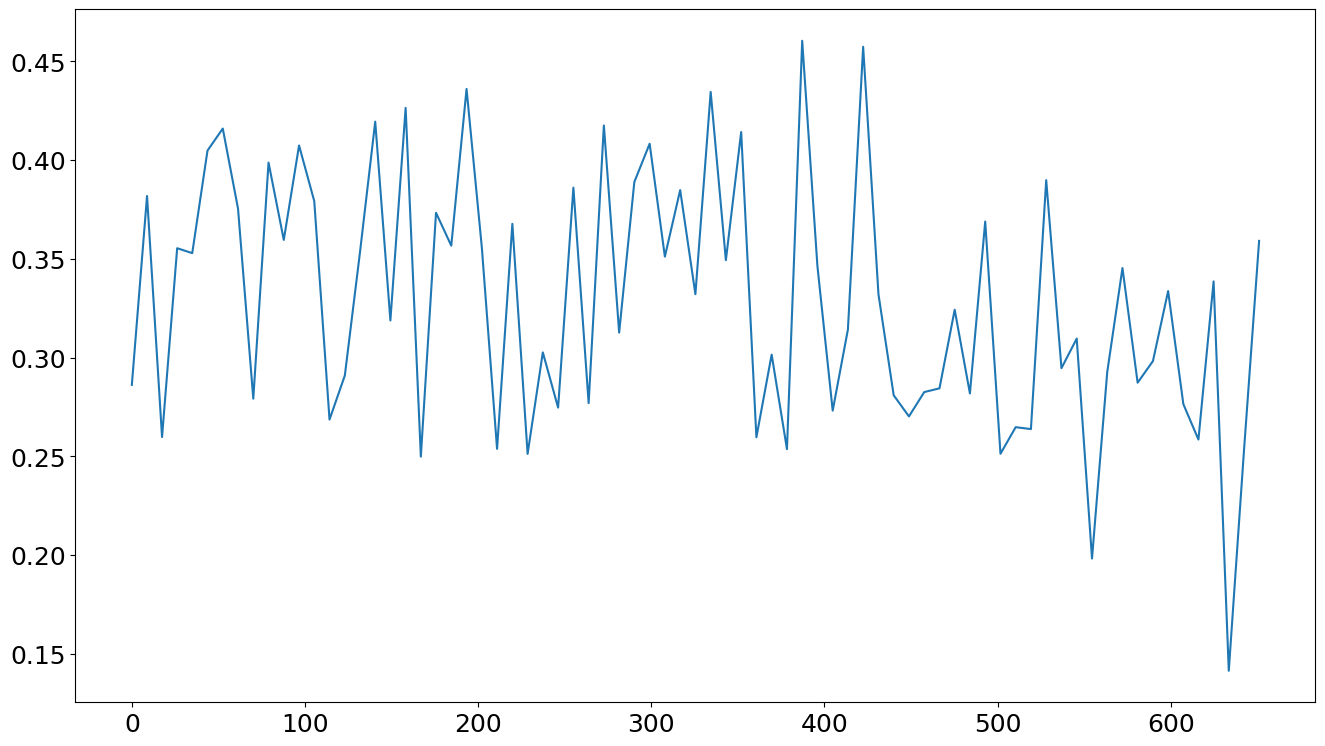

In [3]:
print ("Reading",h5_file)
hf = h5py.File(h5_file, 'r')

NFFT = hf["data"].attrs['NFFT']
fc = hf["data"].attrs['fc']
fs = hf["data"].attrs['fs']
gain = hf["data"].attrs['gain']
t_int = hf["data"].attrs['t_int']

freq = np.linspace(fc-(fs/2), fc+(fs/2), NFFT)/1e6

len_data = hf["data/timestamps"][()].shape[0]
len_cal_data = int(len_data/3)-1

ant_index  = np.where(hf["data/obssource"][()]==0)[0][0:len_cal_data]
cold_index = np.where(hf["data/obssource"][()]==1)[0][0:len_cal_data]
hot_index  = np.where(hf["data/obssource"][()]==2)[0][0:len_cal_data]

ant_data = hf["data/radio"][()][ant_index, :]
cold_data = hf["data/radio"][()][cold_index, :]
hot_data = hf["data/radio"][()][hot_index, :]
temperature = hf["data/temperature"][()][ant_index]

ant_tstamps = hf["data/timestamps"][()][ant_index]
ant_tstamps = ant_tstamps - ant_tstamps[0]

hf.close()

ant_calibrated = ant_data/(hot_data - cold_data)
cold_calibrated = cold_data/(hot_data - cold_data)
hot_calibrated = hot_data/(hot_data - cold_data)

mean_ant_power = np.mean(ant_calibrated, axis=1)
mean_ant_spectrum = np.mean(ant_calibrated, axis=0)

mean_cold_power = np.mean(cold_calibrated, axis=1)
mean_cold_spectrum = np.mean(cold_calibrated, axis=0)

mean_hot_power = np.mean(hot_calibrated, axis=1)
mean_hot_spectrum = np.mean(hot_calibrated, axis=0)

plt.figure(figsize=(16,9))
# plt.semilogy(mean_ant_spectrum)
# plt.semilogy(mean_cold_spectrum)
plt.semilogy(freq, mean_hot_spectrum)

plt.figure(figsize=(16,9))
plt.plot(freq, mean_ant_spectrum-mean_cold_spectrum)

# plt.figure(figsize=(16,9))
# plt.hist(mean_ant_spectrum-mean_cold_spectrum, bins=100)

# plt.figure(figsize=(16,9))
# plt.semilogy(ant_data.T)
# plt.semilogy(hot_data.T)
# plt.semilogy(cold_data.T)

plt.figure(figsize=(16,9))
# plt.plot(ant_tstamps, mean_ant_power)
# plt.plot(ant_tstamps, mean_cold_power)
plt.plot(ant_tstamps, (mean_ant_power-mean_cold_power)*100/mean_ant_power)

# plt.figure(figsize=(16,9))
# plt.plot(ant_tstamps, temperature)
